In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [2]:
from scrinet.interfaces import lalutils

In [3]:
import phenom

In [4]:
import lalsimulation as lalsim

In [5]:
1./0.000244140625

4096.0

In [6]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [7]:
def get_phase(hlm):
    return np.unwrap(np.angle(hlm))

def get_freq(times, hlm):
    phase = get_phase(hlm)
    iphase = IUS(times, phase)
    
    return iphase.derivative()(times) / 2 / np.pi

In [8]:
def gen_wf(mtotal, q, chi1z, chi2z, f_min, deltaT=1/4096.):
    m1, m2 = phenom.m1_m2_M_q(mtotal, q)
    params = lalutils.gen_td_modes_wf_params(
        m1=m1,
        m2=m2,
        approximant=lalsim.SEOBNRv4P,
        S1z=chi1z,
        S2z=chi2z,
        f_min=f_min,
        deltaT=deltaT
    )
    times_Sec, hlms = lalutils.gen_td_modes_wf(params)
    times = phenom.StoM(times_Sec, params['m1']+params['m2'])
    
    freq_hz = get_freq(times_Sec, hlms[(2,2)])
    
    return times, hlms[(2,2)], freq_hz

In [9]:
case1={}
case1['times'], case1['h22'], case1['f_hz'] = gen_wf(mtotal=60, q=1, chi1z=-0.99, chi2z=-0.99, f_min=8, deltaT=1/2048.)

case2={}
case2['times'], case2['h22'], case2['f_hz'] = gen_wf(mtotal=60, q=1, chi1z=0.99, chi2z=0.99, f_min=8, deltaT=1/2048.)

case3={}
case3['times'], case3['h22'], case3['f_hz'] = gen_wf(mtotal=60, q=8, chi1z=-0.99, chi2z=-0.99, f_min=8, deltaT=1/2048.)

case4={}
case4['times'], case4['h22'], case4['f_hz'] = gen_wf(mtotal=60, q=8, chi1z=0.99, chi2z=0.99, f_min=8, deltaT=1/2048.)

In [10]:
for c in [case1['f_hz'][0], case2['f_hz'][0], case3['f_hz'][0], case4['f_hz'][0]]:
    print(c)

-8.000439395325056
-8.000196646401902
-8.000186108367565
-8.000047828143579


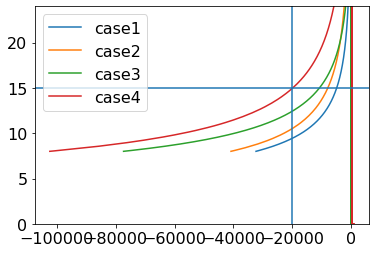

In [11]:
plt.figure()
plt.plot(case1['times'], -case1['f_hz'], label='case1')
plt.plot(case2['times'], -case2['f_hz'], label='case2')
plt.plot(case3['times'], -case3['f_hz'], label='case3')
plt.plot(case4['times'], -case4['f_hz'], label='case4')
plt.legend()
plt.ylim(0, 24)
# plt.xlim(-30000, -20000)
plt.axhline(15)
plt.axvline(-20000)

In [12]:
tt=np.linspace(0, 10000, 5000)
print(tt[1]-tt[0])

2.000400080016003


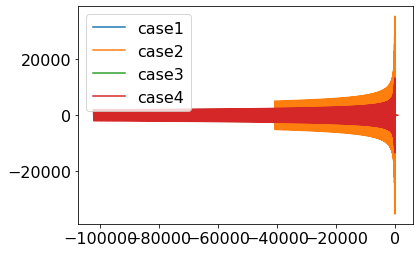

In [13]:
plt.figure()
plt.plot(case1['times'], case1['h22'].real, label='case1')
plt.plot(case2['times'], case2['h22'].real, label='case2')
plt.plot(case3['times'], case3['h22'].real, label='case3')
plt.plot(case4['times'], case4['h22'].real, label='case4')
plt.legend()

(-100, 200)

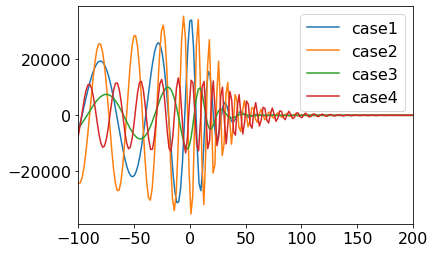

In [14]:
plt.figure()
plt.plot(case1['times'], case1['h22'].real, label='case1')
plt.plot(case2['times'], case2['h22'].real, label='case2')
plt.plot(case3['times'], case3['h22'].real, label='case3')
plt.plot(case4['times'], case4['h22'].real, label='case4')
plt.legend()
plt.xlim(-100,200)

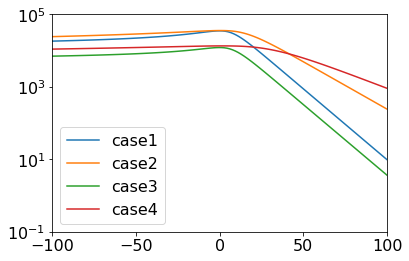

In [15]:
plt.figure()
plt.plot(case1['times'], np.abs(case1['h22']), label='case1')
plt.plot(case2['times'], np.abs(case2['h22']), label='case2')
plt.plot(case3['times'], np.abs(case3['h22']), label='case3')
plt.plot(case4['times'], np.abs(case4['h22']), label='case4')
plt.legend()
plt.xlim(-100,100)
plt.ylim(1e-1, 1e5)
plt.yscale('log')

(-10, 100)

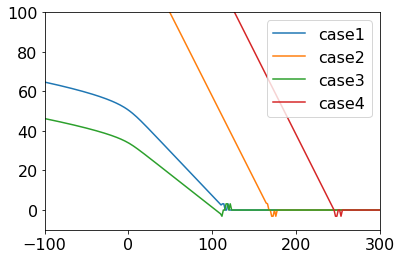

In [37]:
plt.figure()

p1 = np.unwrap(np.angle(case1['h22']))
p2 = np.unwrap(np.angle(case2['h22']))
p3 = np.unwrap(np.angle(case3['h22']))
p4 = np.unwrap(np.angle(case4['h22']))

p1 = p1 - p1[-1]
p2 = p2 - p2[-1]
p3 = p3 - p3[-1]
p4 = p4 - p4[-1]

plt.plot(case1['times'], p1, label='case1')
plt.plot(case2['times'], p2, label='case2')
plt.plot(case3['times'], p3, label='case3')
plt.plot(case4['times'], p4, label='case4')
plt.legend()
plt.xlim(-100,300)
plt.ylim(-10,100)
# plt.ylim(-3000, -2300)
# plt.yscale('log')